## 1. 가설 설정
- 골목상권 중 유동인구가 밀집된 특정 지역이 존재할 것이다.

## 2. 가설 설정 배경
- 발달상권이 많이 포함된 강남구, 서초구는 상대적으로 골목상권에서 약세를 보일 것으로 예상된다.
    - 회사 등의 일자리와 각종 교육 인프라가 밀집된 지역에 생활인구가 치중될 것이기 때문.
- 그와는 반대로 유동인구 밀도가 높은 골목상권도 존재할 수 있을 것이다.
    - 가령 지하철역 주변 골목상권 같은...    

## 3. 인구 데이터 준비
- 생활인구 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 생활인구(유동인구) 데이터
df = pd.read_csv(r"population.csv", encoding='cp949')
df.head(2)

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
0,2023,1,U,관광특구,3001496,강남 마이스 관광특구,109623,55025,54598,8151,...,175,175,139,40,49,108,156,149,121,38
1,2023,1,U,관광특구,3001495,잠실 관광특구,4186941,2027264,2159678,488085,...,7614,7867,9198,4856,8071,7975,7221,7257,8481,4669


In [3]:
# 최신 데이터 분석을 위해 2022, 2023 데이터만 추출 & 골목상권 데이터만 추출
df_22 = df[(df['기준 년코드']==2022) & (df['상권_구분_코드']=='A')].reset_index(drop=True)
df_23 = df[(df['기준 년코드']==2023) & (df['상권_구분_코드']=='A')].reset_index(drop=True)

## 4. 골목상권 데이터 준비
- 골목상권코드 데이터

In [4]:
# 골목상권 데이터와 자치구, 행정동 코드를 결합하기 위해 골목상권코드 데이터 import
code = pd.read_csv(r'code.csv')

In [5]:
# 첫 행을 컬럼명으로 변경
code.rename(columns=code.iloc[0], inplace=True)
code.drop(code.index[0], inplace=True)

In [6]:
# 골목상권으로 분류되는 코드만 추출
code = code[code['상권분류']=='골목상권']
code

,순번,자치구,행정동,상권코드,상권명,상권분류,면적(㎡),NaN
7,7,종로구,평창동,3110001,이북 5 도청사,골목상권,"108,529",NaN
8,8,종로구,무악동,3110002,독립문역 1 번,골목상권,"31,531",NaN
9,9,종로구,부암동,3110003,세검정초등학교,골목상권,"191,570",NaN
10,10,종로구,무악동,3110004,대신고등학교,골목상권,"18,781",NaN
11,11,종로구,부암동,3110005,세검정,골목상권,"244,923",NaN
...,...,...,...,...,...,...,...,...
1073,1073,강동구,명일 2 동,3111086,한영중고,골목상권,"75,463",NaN
1074,1074,강동구,고덕 2 동,3111087,고덕중학교(고덕 2 동주민센터),골목상권,"63,497",NaN
1075,1075,강동구,고덕 2 동,3111088,고덕동성당,골목상권,"71,669",NaN
1076,1076,강동구,상일동,3111089,상일여고(상일초등학교),골목상권,"126,943",NaN


In [7]:
# 상권코드를 통한 데이터프레임 병합(join key)을 위해 공통된 형식(끝 4자리)으로 변환 
for i in range (len(code)):
    code['상권코드'].iloc[i] = code['상권코드'].iloc[i][3:]

C:\Users\defy2\AppData\Local\Temp\ipykernel_15896\3381005092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code['상권코드'].iloc[i] = code['상권코드'].iloc[i][3:]


In [8]:
# code 데이터의 컬럼명을 바꾸고 필요한 컬럼만 추출
code.rename(columns={'상권코드':'code', '면적(㎡)':'area'}, inplace=True)
code = code[['자치구', '행정동', 'area','code']]

## 5. 데이터 조인
- '상권_코드' 컬럼을 조인키로
- 병합 대상
    - 생활인구 데이터
    - 골목상권코드 데이터

In [9]:
# 상권코드 컬럼을 문자열로 변환
df_22 = df_22.astype({'상권_코드':'string'})
df_23 = df_23.astype({'상권_코드':'string'})

In [10]:
# 상권코드를 끝 4자리로 변환
for i in range (len(df_22)):
    df_22['상권_코드'].iloc[i] = df_22['상권_코드'].iloc[i][3:]
    
for i in range (len(df_23)):
    df_23['상권_코드'].iloc[i] = df_23['상권_코드'].iloc[i][3:]

In [11]:
# 컬럼 단순화를 위해 컬럼 이름 변경
df_22.rename(columns={'기준_분기_코드':'quarter', '상권_코드':'code', '상권_코드_명':'name', '총_생활인구_수':'total', '남성_생활인구_수':'total_m', '여성_생활인구_수':'total_w', '시간대_1_생활인구_수':'time_1', '시간대_2_생활인구_수':'time_2', '시간대_3_생활인구_수':'time_3', '시간대_4_생활인구_수':'time_4', '시간대_5_생활인구_수':'time_5', '시간대_6_생활인구_수':'time_6', '월요일_생활인구_수':'mon', '화요일_생활인구_수':'tue','수요일_생활인구_수':'wed', '목요일_생활인구_수':'thur', '금요일_생활인구_수':'fri', '토요일_생활인구_수':'sat', '일요일_생활인구_수':'sun', '연령대_20_생활인구_수':'20', '연령대_30_생활인구_수':'30', '연령대_40_생활인구_수':'40', '연령대_50_생활인구_수':'50', '연령대_60_이상_생활인구_수':'60'}, inplace=True)
df_23.rename(columns={'기준_분기_코드':'quarter', '상권_코드':'code', '상권_코드_명':'name', '총_생활인구_수':'total', '남성_생활인구_수':'total_m', '여성_생활인구_수':'total_w', '시간대_1_생활인구_수':'time_1', '시간대_2_생활인구_수':'time_2', '시간대_3_생활인구_수':'time_3', '시간대_4_생활인구_수':'time_4', '시간대_5_생활인구_수':'time_5', '시간대_6_생활인구_수':'time_6', '월요일_생활인구_수':'mon', '화요일_생활인구_수':'tue','수요일_생활인구_수':'wed', '목요일_생활인구_수':'thur', '금요일_생활인구_수':'fri', '토요일_생활인구_수':'sat', '일요일_생활인구_수':'sun', '연령대_20_생활인구_수':'20', '연령대_30_생활인구_수':'30', '연령대_40_생활인구_수':'40', '연령대_50_생활인구_수':'50', '연령대_60_이상_생활인구_수':'60'}, inplace=True)

In [12]:
# 필요한 컬럼 추출
df_22 = df_22[['quarter', 'code', 'name', 'total', 'total_m', 'total_w', 'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 
               'time_6', 'mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun', '20', '30', '40', '50', '60']]
df_23 = df_23[['quarter', 'code', 'name', 'total', 'total_m', 'total_w', 'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 
               'time_6', 'mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun', '20', '30', '40', '50', '60']]

In [13]:
# 상권코드를 기준으로 데이터 병합
df_22_f = df_22.merge(code, how='outer', on='code')
df_23_f = df_23.merge(code, how='outer', on='code')

## 6. 병합 데이터 전처리
- 결측치 처리
- 차원축소

In [14]:
# 23년 데이터에 상권명이 비어있으므로 22년 데이터와의 결합을 통해 채워넣음
df_name = df_22[['code', 'name']]
df_name.drop_duplicates(inplace=True)
df_23_f = df_23_f.merge(df_name, how='inner', on='code')

C:\Users\defy2\AppData\Local\Temp\ipykernel_15896\3184556917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_name.drop_duplicates(inplace=True)


In [15]:
df_23_f = df_23_f.drop(['name_x'], axis=1)
df_23_f.rename(columns={'name_y':'name'},inplace=True)

In [16]:
df_23_f

,quarter,code,total,total_m,total_w,time_1,time_2,time_3,time_4,time_5,...,sun,20,30,40,50,60,자치구,행정동,area,name
0,1.0,1090,60448.0,29345.0,31103.0,15225.0,12659.0,7273.0,7265.0,10084.0,...,8496.0,6118.0,10082.0,11420.0,7009.0,13919.0,강동구,강일동,"29,486",강일동주민센터
1,1.0,1089,872148.0,426234.0,445915.0,220614.0,189357.0,110903.0,99843.0,141992.0,...,116816.0,87435.0,136461.0,157570.0,150688.0,218208.0,강동구,상일동,"126,943",상일여고(상일초등학교)
2,1.0,1088,307998.0,148192.0,159805.0,80624.0,69956.0,36869.0,34618.0,47833.0,...,44318.0,27798.0,45452.0,54806.0,44567.0,74950.0,강동구,고덕 2 동,"71,669",고덕동성당
3,1.0,1087,206443.0,101239.0,105204.0,66995.0,45802.0,19711.0,18046.0,27013.0,...,28661.0,20016.0,25256.0,35611.0,29619.0,56420.0,강동구,고덕 2 동,"63,497",고덕중학교(고덕2동주민센터)
4,1.0,1086,393189.0,179518.0,213671.0,83652.0,76166.0,53087.0,53926.0,75904.0,...,55949.0,32515.0,36399.0,62977.0,53085.0,99472.0,강동구,명일 2 동,"75,463",한영중고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1.0,0004,642485.0,294769.0,347715.0,125860.0,131581.0,88539.0,91948.0,124734.0,...,89490.0,78201.0,88409.0,102874.0,97815.0,157389.0,종로구,무악동,"18,781",대신고등학교
1086,1.0,0003,543590.0,245372.0,298218.0,185602.0,115352.0,51453.0,48959.0,70433.0,...,78783.0,60841.0,53409.0,87129.0,86842.0,144175.0,종로구,부암동,"191,570",세검정초등학교
1087,1.0,0002,560130.0,248940.0,311189.0,117892.0,119832.0,76306.0,78830.0,100857.0,...,75785.0,68041.0,71259.0,80137.0,84568.0,154184.0,종로구,무악동,"31,531",독립문역 1번
1088,1.0,0001,165477.0,72891.0,92585.0,41816.0,34996.0,18908.0,20040.0,28030.0,...,25411.0,17357.0,18021.0,24478.0,26358.0,48732.0,종로구,평창동,"108,529",이북5도청사


In [17]:
# 공공포털데이터에 공시되어 있지 않은 골목상권은 결측값을 가지므로 분석에서 제거
df_22_f.dropna(inplace=True)
df_23_f.dropna(inplace=True)

## 7.1. 분석 1
- 요일별 생활인구 분포를 확인한다.
    - 박스플롯으로 분포 확인

In [18]:
df_23_ff = df_23_f[['quarter', 'code', 'total', 'total_m', 'total_w', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'time_6', 'mon', 'tue', 'wed', 'thur',
       'fri', 'sat', 'sun', '20', '30', '40', '50', '60']]
df_22_ff = df_22_f[['quarter', 'code', 'total', 'total_m', 'total_w', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'time_6', 'mon', 'tue', 'wed', 'thur',
       'fri', 'sat', 'sun', '20', '30', '40', '50', '60']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6350981f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b635099eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b635098e20>,
 'medians': [<matplotlib.lines.Line2D at 0x1b635099be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b6350993a0>,
 'means': []}

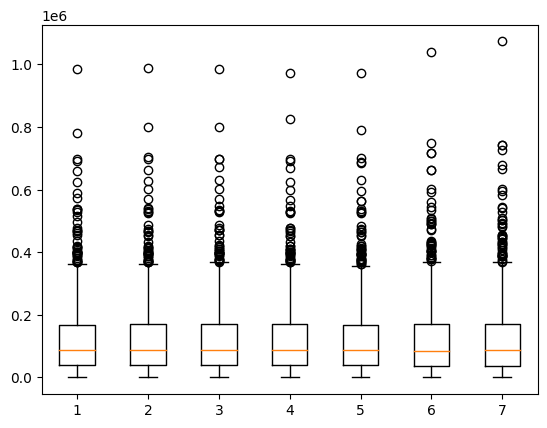

In [19]:
# 요일별 생활인구 분포
plt.boxplot(df_23_ff[['mon','tue','wed','thur','fri','sat','sun']])

## 7.2. 분석 1 결과
- 딱히 요일별로 눈에 띄는 차이가 보이지는 않음.

## 8.1. 분석 2
- 시간대별 생활인구 분포를 파악한다.
    - 박스플롯으로 분포 확인

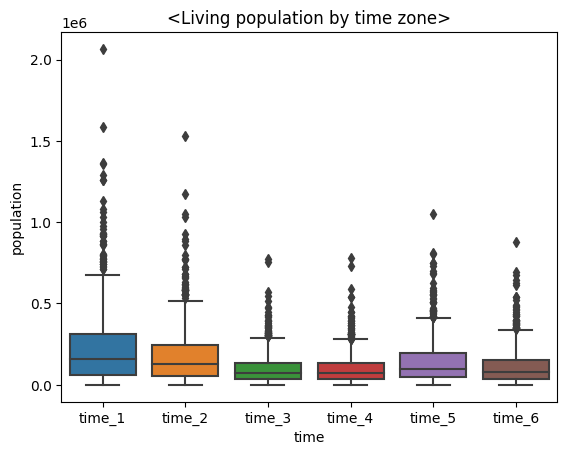

In [20]:
# 데이터프레임을 'melt'하여 시간대와 생활인구 데이터를 한 열로 합치기
df_23_ff_melted = pd.melt(df_23_ff, id_vars=['quarter', 'code'], 
                          value_vars=['time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6'], 
                          var_name='time', value_name='population')

# 시간대별 생활인구 분포 시각화
sns.boxplot(x='time', y='population', data=df_23_ff_melted)
plt.title('<Living population by time zone>')
plt.show()

## 8.2. 분석2 결과
- 상대적으로 생활인구(유동인구)가 많은 시간대는 다음과 같다.
    - 1위) 시간대 1(0 ~ 6시)
    - 2위) 시간대 2(6 ~ 11시)
    - 3위) 시간대 5(17 ~ 21시)
- 유동인구가 많은 시간대일수록 IQR 사이즈가 큰 경향을 보인다.

## 9.1. 분석 3
- 어느 시간대에 유동인구가 몰리는지는 알았다.
    - 그렇다면 각 시간대 별로 유동인구가 몰리는 지역들은 어디인가?

In [21]:
# 시각화 결과를 바탕으로 시간대 1에 생활인구가 밀집되어 있는 지역 추출
df_result_1 = df_23_f[df_23_f['time_1']>0.51e6].groupby('자치구')['자치구'].count().sort_values().to_frame()
df_result_1.rename(columns={'자치구':'time_1'}, inplace=True)

In [22]:
# 시각화 결과를 바탕으로 시간대 2에 생활인구가 밀집되어 있는 지역 추출
df_result_2 = df_23_f[df_23_f['time_2']>0.41e6].groupby('자치구')['자치구'].count().sort_values().to_frame()
df_result_2.rename(columns={'자치구':'time_2'}, inplace=True)

In [23]:
# 시간대 3~6은 주석 생략
df_result_3 = df_23_f[df_23_f['time_3']>0.21e6].groupby('자치구')['자치구'].count().sort_values().to_frame()
df_result_3.rename(columns={'자치구':'time_3'}, inplace=True)

In [24]:
df_result_4 = df_23_f[df_23_f['time_4']>0.21e6].groupby('자치구')['자치구'].count().sort_values().to_frame()
df_result_4.rename(columns={'자치구':'time_4'}, inplace=True)

In [25]:
df_result_5 = df_23_f[df_23_f['time_5']>0.41e6].groupby('자치구')['자치구'].count().sort_values().to_frame()
df_result_5.rename(columns={'자치구':'time_5'}, inplace=True)

In [26]:
df_result_6 = df_23_f[df_23_f['time_6']>0.31e6].groupby('자치구')['자치구'].count().sort_values().to_frame()
df_result_6.rename(columns={'자치구':'time_6'}, inplace=True)
df_result_6

,time_6
자치구,
강남구,1
영등포구,1
서대문구,1
도봉구,1
은평구,2
용산구,2
송파구,2
종로구,2
동대문구,2


In [27]:
# 시간대별 상위 생활인구 데이터를 자치구 기준으로 병합
from functools import reduce

df_time = reduce(lambda x,y: pd.merge(x,y, left_index=True, right_index=True, how='outer'), 
                 [df_result_1, df_result_2, df_result_3, df_result_4, df_result_5, df_result_6])
df_time['noon'] = df_time['time_1']+df_time['time_2']+df_time['time_3']
df_time['after'] = df_time['time_4']+df_time['time_5']+df_time['time_6']
df_time['difference'] = df_time['noon']-df_time['after']
df_time.sort_values(by='difference', ascending=False)

,time_1,time_2,time_3,time_4,time_5,time_6,noon,after,difference
자치구,,,,,,,,,
강서구,10.0,9.0,10.0,9.0,2.0,6.0,29.0,17.0,12.0
중랑구,10.0,5.0,6.0,6.0,2.0,2.0,21.0,10.0,11.0
송파구,6.0,7.0,8.0,6.0,2.0,2.0,21.0,10.0,11.0
광진구,9.0,6.0,5.0,5.0,2.0,4.0,20.0,11.0,9.0
성북구,6.0,6.0,8.0,8.0,2.0,3.0,20.0,13.0,7.0
구로구,7.0,4.0,4.0,4.0,2.0,3.0,15.0,9.0,6.0
용산구,3.0,4.0,5.0,4.0,1.0,2.0,12.0,7.0,5.0
강북구,5.0,3.0,3.0,3.0,2.0,2.0,11.0,7.0,4.0
동대문구,4.0,5.0,8.0,8.0,3.0,2.0,17.0,13.0,4.0


## 9.2. 분석 3 결과
- 이는 각 시간대별로 각 자치구 내에서 생활인구가 밀집된 상권의 수를 카운팅한 것.
    - 대체로 오후(시간대 4 ~ 6)보다 오전(시간대 1 ~ 3)에 인구 밀집지역이 많은 경향이 있다.
- 오전과 오후의 차이가 두드러지는 자치구들이 존재한다.
    - 강서구, 중랑구, 송파구 등은 오후에 인구밀집지역이 감소하는 경향이 있다 보아야할 것.
- 특정 시간대에만 유독 인구 밀집지역이 늘어나는 지역도 있다.
    - 강서구, 광진구가 대표적

## 10. 추가 - 세부 상권파악
- 특정 시간대에 유동인구가 밀집되는 상권들의 수와 현황을 자치구별로 파악할 수 있다.
    - 예시)
        - 가령 시간대 1에 유동인구 밀집이 관측되는 상권들의 수를 자치구별로 카운팅 하면.
        - 인구밀도 높은 상권이 많은 몇 개의 상위권 자치구를 선정할 수도 있다.
            - 강동구 : 10개
            - 강서구 : 10개
            - 중랑구 : 10개
            - 광진구 : 9개
            - 관악구 : 8개...

Text(0.5, 1.0, '<시간대_1 생활인구 상위 5개 자치구>')

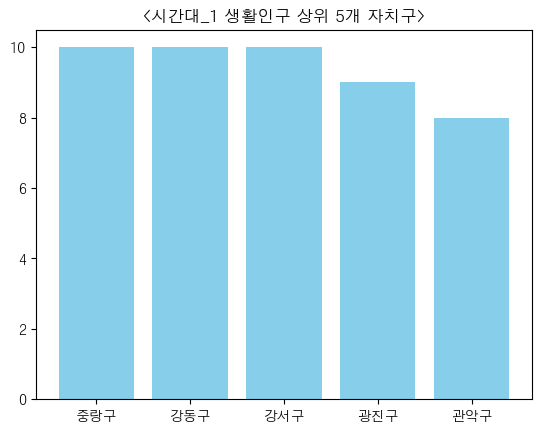

In [28]:
# 한글 깨짐 현상 해결
from matplotlib import font_manager, rc 
font_path = "C:/Windows/Fonts/H2GTRM.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

# 시간대 1에 생활인구 밀집 상권 개수 많은 자치구 5개
index_1 = ['중랑구','강동구','강서구', '광진구', '관악구']
df_time_1=df_time.sort_values(by='time_1', ascending=False)
plt.bar(x=index_1, height=df_time_1['time_1'][0:5], color='skyblue')
plt.title('<시간대_1 생활인구 상위 5개 자치구>')

In [29]:
# 시간대 1에 강동구에서 유동인구 밀집이 관측되는 상권들
df_23_f[(df_23_f['time_1']>0.51e6)&(df_23_f['자치구']=='강동구')]['name'].to_frame()

,name
12,굽은다리역 4번
13,길동주민센터(강동도서관)
17,둔촌동역 1번(한산중학교)
18,굽은다리역 1번(십자성마을)
21,천호1동주민센터
23,강동구립성내도서관
29,암사역 1번
30,암사역 2번(서울강동초등학교)
31,강동역 4번(강풀만화거리)
39,천호역 6번


In [30]:
# 시간대 1에 강서구에서 유동인구 밀집이 관측된 상권들
df_23_f[(df_23_f['time_1']>0.51e6)&(df_23_f['자치구']=='강서구')]['name'].to_frame()

,name
414,화곡4동주민센터
418,등촌1동주민센터
424,곰달래도서관
427,까치산역 1번
430,화곡역 4번
433,까치산역 3번
435,까치산역 4번
442,화곡역 5번
451,신방화역 2번
455,송정역 3번


In [31]:
# 이쪽은 중랑구. 다른 조건은 동일.
df_23_f[(df_23_f['time_1']>0.51e6)&(df_23_f['자치구']=='중랑구')]['name'].to_frame()

,name
823,면목동우체국
825,면목역 2번
827,상봉역 3번
832,상봉역 7번
833,면목2동체육관
834,상봉역 4번
835,오거리공원
840,중화역 1번
842,먹골역 1번
853,신묵초등학교


In [32]:
# 광진구
df_23_f[(df_23_f['time_1']>0.51e6)&(df_23_f['자치구']=='광진구')]['name'].to_frame()

,name
919,동대부여고
922,용마초등학교
923,구의1동주민센터
930,구의역 4번
931,중곡3동주민센터
939,중곡1동 마을마당
947,화양사거리
949,건대입구역 6번
950,자양4동주민센터


In [33]:
# 관악구
df_23_f[(df_23_f['time_1']>0.51e6)&(df_23_f['자치구']=='관악구')]['name'].to_frame()

,name
187,사당역 4번
189,낙성대역 1번(관악구민 종합체육센터)
194,샤로수길
197,관악구 중앙길
208,구립대학경로당(관악산샘말공원)
220,"신림역 5번(신림동주민센터, 신림동별빛거리)"
224,남강고등학교(남강중학교)
228,관악구신사동주민센터
